In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

from os import mkdir
from os.path import isdir
rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Lupus-Microbiome-Published/'

colors = ['#377eb8','lime','C1', '#a65628', '#AAAA00','#bbbbbb','#000000']

alpha = [0.01, 0.05, 0.1, 0.5, 1.0]#, 5.0, 10.0]
keys = ['Adaptive_With_Modeshifting',  'Adaptive_Without_Modeshifting', 
        'Fixed_With_Modeshifting',  'Fixed_Without_Modeshifting','DNACLUST', 'CDHIT', 'UCLUST']

titles = ['Adaptive Sampling + Mode-Shifting (SCRAPT)', 'Adaptive Sampling Without Mode-Shifting',
          'Naive Sampling + Mode-Shifting', 'Naive Sampling Without Mode-Shifting',
          'DNACLUST', 'CDHIT', 'UCLUST']

out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/Lupus_Microbiome_Published/Parameterize_Delta/'
if not isdir(out_path):
    mkdir(out_path)

s = 0.98

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))

In [3]:
sim = pickle.load(open(data_dir+'/sim_'+str(s)+'.pkl', "rb"))
#n = 16608513 #Spatial_Soil
#times = {0.99:184, 0.98:836, 0.97:863, 0.96:1053, 0.95:758}#Spatial_soil 

n = 980180 #Lupus-Published 
times = {0.99:19, 0.98:13, 0.97:8, 0.96:5, 0.95:4}#Lupus-Published 

#n = 1773145 #Lupus-Unpublished
#times = {0.99:36, 0.98:32, 0.97:20, 0.96:13, 0.95:12} #Lupus-Unpublished

print(sim.keys())

dict_keys(['DNACLUST', 5.0, 10.0, 0.5, 1.0, 0.1, 'CDHIT', 'UCLUST'])


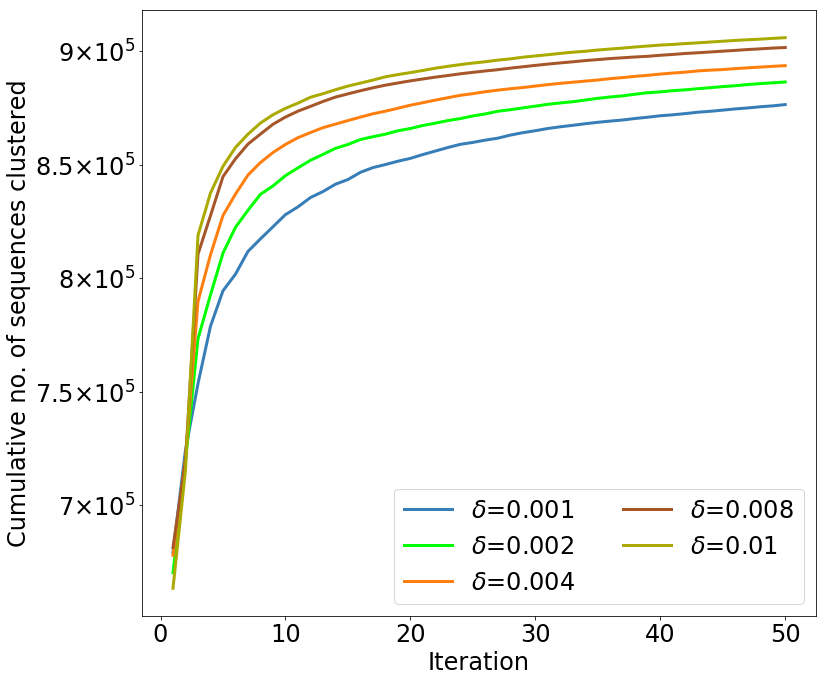

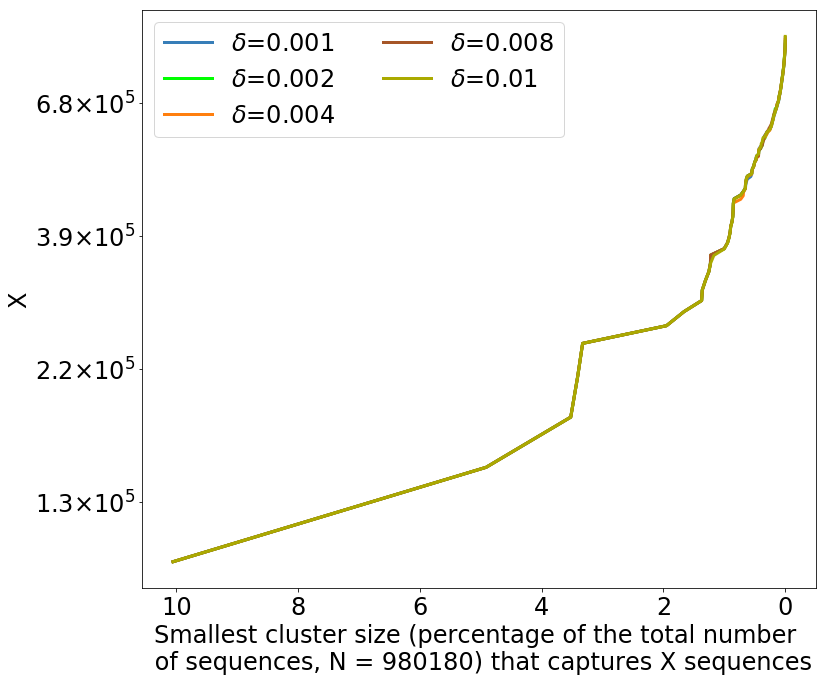

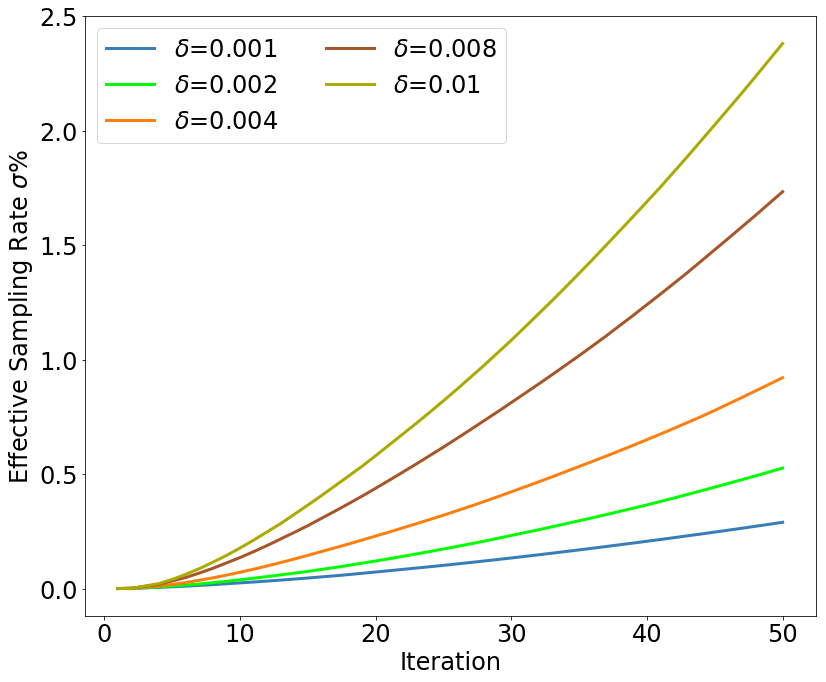

In [4]:
plt.rcParams.update(rcParams)

fig1, ax1 = plt.subplots(1,1, figsize = (12, 10))
fig2, ax2 = plt.subplots(1,1, figsize = (12, 10))
fig3, ax3 = plt.subplots(1,1, figsize = (12, 10))

delta = ['0.001','0.002','0.004','0.008','0.01']
a = 0.1

for i in range(len(delta)):
    d = delta[i]
    ax1.plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Seq_Counts']), 
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax2.plot(np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][1])/n*100.0,
             np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][0]),
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax3.plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Sampling Rate']), 
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
ax2.set_yscale('log', basey=1.75)
ax1.legend(ncol = 2, loc = 4)
ax2.legend(ncol = 2, loc = 2)
ax3.legend(ncol = 2, loc = 2)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(g))

ax1.set_xlabel('Iteration')
ax2.set_xlabel('Smallest cluster size (percentage of the total number \n of sequences, N = '+str(n)+
                 ') that captures X sequences')
ax3.set_xlabel('Iteration')

ax1.set_ylabel('Cumulative no. of sequences clustered')
ax2.set_ylabel('X')
ax3.set_ylabel('Effective Sampling Rate '+r'$\sigma$%')
ax2.set_xlim(ax2.get_xlim()[::-1])

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

fig1.savefig(out_path+'Parameterize_Delta_Cum_Seqs_'+str(a)+'_'+str(s)+'.pdf')
fig2.savefig(out_path+'Parameterize_Delta_Frag_Measure_'+str(a)+'_'+str(s)+'.pdf')
fig3.savefig(out_path+'Parameterize_Delta_Effective_Sigma_'+str(a)+'_'+str(s)+'.pdf')
